In [1]:
import pandas as pd
import numpy as np

from TREEplus import *

C:\Users\danie\AppData\Local\Temp\ipykernel_14832\1183594070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.options.display.max_columns = None
dataframe = pd.read_table('lpmc.dat')
print(dataframe.shape)
dataframe.head()

(81086, 32)


,trip_id,household_id,person_n,trip_n,travel_mode,purpose,fueltype,faretype,bus_scale,survey_year,travel_year,travel_month,travel_date,day_of_week,start_time,age,female,driving_license,car_ownership,distance,dur_walking,dur_cycling,dur_pt_access,dur_pt_rail,dur_pt_bus,dur_pt_int,pt_interchanges,dur_driving,cost_transit,cost_driving_fuel,cost_driving_ccharge,driving_traffic_percent
0,0,0,0,0,4,3,1,1,1.0,1,2012,4,1,7,10.000000,56,1,1,2,778,0.218056,0.092222,0.134444,0.0,0.016667,0.0,0,0.052222,1.5,0.14,0.0,0.111702
1,1,0,0,1,4,3,1,1,1.0,1,2012,4,1,7,13.000000,56,1,1,2,778,0.188889,0.061944,0.109444,0.0,0.055556,0.0,0,0.059444,1.5,0.15,0.0,0.112150
2,2,0,0,2,4,3,1,1,1.0,1,2012,4,1,7,17.000000,56,1,1,2,4562,1.037778,0.355833,0.203056,0.0,0.210278,0.0,0,0.236667,1.5,0.79,0.0,0.203052
3,3,0,0,3,4,3,1,1,1.0,1,2012,4,1,7,17.350000,56,1,1,2,4562,1.039444,0.384444,0.205556,0.0,0.258611,0.0,0,0.233333,1.5,0.78,0.0,0.160714
4,4,0,1,2,4,3,1,4,1.0,1,2012,4,1,7,19.583333,54,0,1,2,4562,1.037778,0.355833,0.203056,0.0,0.189444,0.0,0,0.229167,1.5,0.78,0.0,0.130909


In [3]:
#binning age

groupDict={'0-18':0,'19-30':0,'31-65':0, '66+': 0}

for i in dataframe['age']:
    if i>=0 and i<=10:
        groupDict['0-18']+=1
    elif i>=19 and i<=30:
        groupDict['19-30']+=1
    elif i>=31 and i<=65:
        groupDict['31-65']+=1
    else:
        groupDict['66+']+=1

dataframe.loc[dataframe['age']<=18, 'age_group'] = '0-18'
dataframe.loc[dataframe['age'].between(19,30), 'age_group'] = '19-30'
dataframe.loc[dataframe['age'].between(31,65), 'age_group'] = '31-65'
dataframe.loc[dataframe['age']>65, 'age_group'] = '66+'
dataframe.drop(['age'], axis= 1, inplace = True)


#binning distance

dataframe.loc[dataframe['distance']< 658.50, 'distance_group'] = 'distance01'
dataframe.loc[dataframe['distance'].between(658.50,861.49), 'distance_group'] = 'distance02'
dataframe.loc[dataframe['distance'].between(861.50,1214.49), 'distance_group'] = 'distance03'
dataframe.loc[dataframe['distance'].between(1214.50,1514.49 ), 'distance_group'] = 'distance04'
dataframe.loc[dataframe['distance'].between(1514.50, 2156.49), 'distance_group'] = 'distance05'
dataframe.loc[dataframe['distance'].between(2156.50, 2759.49), 'distance_group'] = 'distance06'
dataframe.loc[dataframe['distance'].between(2759.50, 4391.49), 'distance_group'] = 'distance07'
dataframe.loc[dataframe['distance'].between(4391.50, 5369.49), 'distance_group'] = 'distance08'
dataframe.loc[dataframe['distance'].between(5369.50, 10087.49), 'distance_group'] = 'distance09'
dataframe.loc[dataframe['distance'].between(10087.50, 14695.49), 'distance_group'] = 'distance10'
dataframe.loc[dataframe['distance']>=14695.50, 'distance_group'] = 'distance11'
dataframe.drop('distance', axis = 1, inplace = True)

#binning start time

dataframe.loc[dataframe['start_time']<8.091666, 'starttime_group'] = 'early_morning'
dataframe.loc[dataframe['start_time'].between(8.091666,10.00833320), 'starttime_group'] = 'morning'
dataframe.loc[dataframe['start_time'].between(10.008333211,18.50833320), 'starttime_group'] = 'afternoon'
dataframe.loc[dataframe['start_time']> 18.50833321, 'starttime_group'] = 'evening'
dataframe.drop('start_time', axis = 1, inplace = True)

#binning cost transit

dataframe.loc[dataframe['cost_transit']< 1.52499998, 'cost_group'] = 'low_cost'
dataframe.loc[dataframe['cost_transit'].between(1.52499998,3.01999997), 'cost_group'] = 'medium_cost'
dataframe.loc[dataframe['cost_transit']> 3.01999998, 'cost_group'] = 'high_cost'
dataframe.drop('cost_transit', axis = 1, inplace = True)

#binning cost_driving_Fuel

dataframe.loc[dataframe['cost_driving_fuel']< 0.165, 'costdrivingfuel_group'] = 'costdrivingfuelgroup1'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.165,0.204), 'costdrivingfuel_group'] = 'costdrivingfuelgroup2'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.205,0.244), 'costdrivingfuel_group'] = 'costdrivingfuelgroup3'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.245, 0.294), 'costdrivingfuel_group'] = 'costdrivingfuelgroup4'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.295, 0.354), 'costdrivingfuel_group'] = 'costdrivingfuelgroup5'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.355, 0.44499998), 'costdrivingfuel_group'] = 'costdrivingfuelgroup6'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.44499999, 0.83499997), 'costdrivingfuel_group'] = 'costdrivingfuelgroup7'
dataframe.loc[dataframe['cost_driving_fuel'].between(0.83499998, 1.17499994), 'costdrivingfuel_group'] = 'costdrivingfuelgroup8'
dataframe.loc[dataframe['cost_driving_fuel'].between(1.17499995, 2.31499993), 'costdrivingfuel_group'] = 'costdrivingfuelgroup9'
dataframe.loc[dataframe['cost_driving_fuel']> 2.31499994, 'costdrivingfuel_group'] = 'costdrivingfuelgroup10'
dataframe.drop('cost_driving_fuel', axis = 1, inplace = True)

#binning driving traddic percent

dataframe.loc[dataframe['driving_traffic_percent']< 0.24422751, 'trafficperc_group'] = '0low_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.24422751,0.36449698), 'trafficperc_group'] = '1mediumlow_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.36449699,0.49620750), 'trafficperc_group'] = '2medium_traffic'
dataframe.loc[dataframe['driving_traffic_percent'].between(0.49620751, 0.57161700), 'trafficperc_group'] = '3mediumhigh_traffic'
dataframe.loc[dataframe['driving_traffic_percent']> 0.57161701, 'trafficperc_group'] = '4high_traffic'
dataframe.drop('driving_traffic_percent', axis = 1, inplace = True)

#binning cost_driving_ccharge

dataframe.loc[dataframe['cost_driving_ccharge']< 5.25, 'drivingcharge_group'] = 'low_charge'
dataframe.loc[dataframe['cost_driving_ccharge']> 5.25, 'drivingcharge_group'] = 'high_charge'
dataframe.drop('cost_driving_ccharge', axis = 1, inplace = True)

In [4]:
y = dataframe[['travel_mode', 'travel_year']]
X = dataframe.drop(['travel_mode', 'survey_year'], axis = 1)

print(set(X["travel_year"]))

a = X.loc[X["travel_year"]==2015]
#creating test set 

X_test= X.query('travel_year == 2015') #creates a subset, like this: X.loc[X["travel_year"]==2015]
y_test = y.query('travel_year == 2015')

X_test = X_test.drop(['travel_year'], axis =1).copy()
y_test = y_test.drop(['travel_year'], axis =1).copy()

#create training set 

X_train_1 = X.query('travel_year == 2012')
y_train_1 = y.query('travel_year == 2012')
X_train_2 = X.query('travel_year == 2013')
y_train_2 = y.query('travel_year == 2013')
X_train_3 = X.query('travel_year == 2014')
y_train_3 = y.query('travel_year == 2014')

X_train = pd.concat([X_train_1, X_train_2, X_train_3])
y_train = pd.concat([y_train_1, y_train_2, y_train_3])

X_train = X_train.drop(['travel_year'], axis = 1)
y_train = y_train.drop(['travel_year'], axis = 1)


data = pd.concat([X_train, y_train], axis = 1)
#data = data_to_shuffle.sample(frac=1, random_state = 3).reset_index(drop=True) #sampling returning all, and resetting index , no seed?
y_train = data['travel_mode']
X_train = data.drop(['travel_mode'], axis = 1)

#feature selection

to_drop = ['trip_id', 'household_id', 'person_n', 'trip_n', 'travel_date', 'dur_pt_int',
          'dur_pt_rail', 'dur_pt_access', 'dur_pt_bus', 'dur_walking', 'dur_cycling', 'dur_driving']
print(f'Number of columns dropped: {len(to_drop)}')
X_train.drop(to_drop, axis = 1, inplace = True)

X_test.drop(to_drop, axis = 1, inplace = True)

predictors = X_test.columns
y = y_test #is the whole vector
print(predictors)

datatest = pd.concat([y_test, X_test], axis = 1).reset_index()
datatest.drop('index', axis = 1, inplace = True)
datatest.to_csv("data_test.csv", index = False)

datatraining = pd.concat([y_train, X_train], axis = 1).reset_index()
datatraining.drop('index', axis = 1, inplace = True)
datatraining.to_csv("data_training.csv", index = False)


{2012, 2013, 2014, 2015}


Number of columns dropped: 12
Index(['purpose', 'fueltype', 'faretype', 'bus_scale', 'travel_month',
       'day_of_week', 'female', 'driving_license', 'car_ownership',
       'pt_interchanges', 'age_group', 'distance_group', 'starttime_group',
       'cost_group', 'costdrivingfuel_group', 'trafficperc_group',
       'drivingcharge_group'],
      dtype='object')


In [5]:
X_train.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

#X_train=X_train.applymap(str) moves elements into strings
#y_train=y_train.astype(str)

n_features = X_train
n_features_names = list(X_train.columns)
indici = np.arange(0, len(y_train))
y = y_train





In [6]:
n_features['purpose'] = 'purpose' + n_features['purpose'].astype(str)
n_features['fueltype'] = 'fueltype' + n_features['fueltype'].astype(str)
n_features['faretype'] = 'faretype' + n_features['faretype'].astype(str)
n_features['bus_scale'] = 'bus_scale' + n_features['bus_scale'].astype(str)
n_features['travel_month'] = 'travel_month' + n_features['travel_month'].astype(str)
n_features['day_of_week'] = 'day_of_week' + n_features['day_of_week'].astype(str)
n_features['female'] = 'female' + n_features['female'].astype(str)
n_features['driving_license'] = 'driving_license' + n_features['driving_license'].astype(str)
n_features['car_ownership'] = 'car_ownership' + n_features['car_ownership'].astype(str)
n_features['pt_interchanges'] = 'pt_interchanges' + n_features['pt_interchanges'].astype(str)
n_features['age_group'] = 'age_group' + n_features['age_group'].astype(str)


n_features.head()

,purpose,fueltype,faretype,bus_scale,travel_month,day_of_week,female,driving_license,car_ownership,pt_interchanges,age_group,distance_group,starttime_group,cost_group,costdrivingfuel_group,trafficperc_group,drivingcharge_group
0,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance02,morning,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
1,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance02,afternoon,low_cost,costdrivingfuelgroup1,0low_traffic,low_charge
2,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
3,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month4,day_of_week7,female1,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge
4,purpose3,fueltype1,faretype4,bus_scale1.0,travel_month4,day_of_week7,female0,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance08,evening,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge


In [7]:
features = []
features_names = []


In [8]:
from collections import Counter
import itertools


In [9]:
combinazioni = []
distinct_values= []
distinct_values.append(list(set(y)))
distinct_values = list(itertools.chain(*distinct_values)) #flattens, removed nesting
for i in range(1,len(distinct_values)):
    combinazioni.append(list(itertools.combinations(distinct_values, i)))
combinazioni=combinazioni[1:]
combinazioni = list(itertools.chain(*combinazioni))
combinazioni = combinazioni +  distinct_values
combinazioni

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 1,
 2,
 3,
 4]

In [10]:
c1, c2 = [], []
for i in combinazioni:
        if isinstance(i, int): 
            if [i] not in c2:
                c1.append([i])
            if list(set(y)-{i}) not in c1:
                c2.append(list(set(y)-{i}))
        else:
            if list(i) not in c2:
                c1.append(list(i))
            if list(set(y) - set(tuple(i))) not in c1:
                c2.append(list(set(y) - set(tuple(i))))
            
    
               
c1,c2, len(c1)

([[1, 2], [1, 3], [1, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4]],
 [[3, 4], [2, 4], [2, 3], [4], [3], [2], [1]],
 7)

In [11]:
dict(n_features['distance_group'].value_counts())

{'distance09': 12640,
 'distance07': 11691,
 'distance05': 8878,
 'distance03': 7402,
 'distance06': 6235,
 'distance01': 5844,
 'distance04': 5281,
 'distance10': 5278,
 'distance08': 4782,
 'distance02': 4079,
 'distance11': 3993}

Twoing 

In [12]:
y.head(), features, features_names, n_features.head(), n_features_names

(0    4
 1    4
 2    4
 3    4
 4    4
 Name: travel_mode, dtype: int64,
 [],
 [],
     purpose   fueltype   faretype     bus_scale   travel_month   day_of_week  \
 0  purpose3  fueltype1  faretype1  bus_scale1.0  travel_month4  day_of_week7   
 1  purpose3  fueltype1  faretype1  bus_scale1.0  travel_month4  day_of_week7   
 2  purpose3  fueltype1  faretype1  bus_scale1.0  travel_month4  day_of_week7   
 3  purpose3  fueltype1  faretype1  bus_scale1.0  travel_month4  day_of_week7   
 4  purpose3  fueltype1  faretype4  bus_scale1.0  travel_month4  day_of_week7   
 
     female   driving_license   car_ownership   pt_interchanges  \
 0  female1  driving_license1  car_ownership2  pt_interchanges0   
 1  female1  driving_license1  car_ownership2  pt_interchanges0   
 2  female1  driving_license1  car_ownership2  pt_interchanges0   
 3  female1  driving_license1  car_ownership2  pt_interchanges0   
 4  female0  driving_license1  car_ownership2  pt_interchanges0   
 
         age_group dista

In [13]:
tau = False #making y binary 
if tau:
    y = pd.DataFrame(y)
    y["travel_mode"].loc[y["travel_mode"]==2] = 1
    y["travel_mode"].loc[y["travel_mode"]==4] = 3
    y = y["travel_mode"]

setting class as binary for fast test   

In [14]:
y.value_counts()[1]

13367

Text(0.5, 1.0, 'Distribution of Travel Modes Training Set')

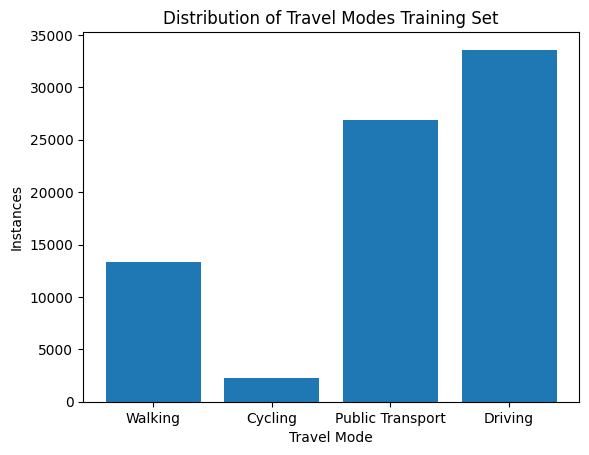

In [15]:
import matplotlib.pyplot as plt

groups = ["Walking", "Cycling", "Public Transport", "Driving"]
countss = [y.value_counts()[1], y.value_counts()[2], y.value_counts()[3], y.value_counts()[4]]
plt.bar(groups, countss)
plt.ylabel("Instances")
plt.xlabel("Travel Mode")
plt.title("Distribution of Travel Modes Training Set")

In [16]:

my_tree = MyNodeClass('n1', indici) 
tree = TREEplus(y,features,features_names,n_features,n_features_names,impurity_fn = "tau",problem="classifier",method = "LATENT-BUDGET-TREE",twoing = True, min_cases_parent= 1000,min_cases_child= 500, max_level = 2, min_imp_gain = 0.0001)
tree.growing_tree(my_tree, max_k = 5, combination_split = False)


Split Found:  n1 [['costdrivingfuel_group', ('costdrivingfuelgroup10', 'costdrivingfuelgroup4', 'costdrivingfuelgroup5', 'costdrivingfuelgroup6', 'costdrivingfuelgroup7', 'costdrivingfuelgroup8', 'costdrivingfuelgroup9'), 1.8887554080312314, 0]] start
node_proportion_total  0.05793579624852918
Split Found:  n2 [['car_ownership', ('car_ownership1', 'car_ownership2'), 1.8972547414252556, 1]] left
node_proportion_total  0.45540360423465953
Node_proportion_gain  0.39746780798613035
Split Found:  n4 [['age_group', ('age_group0-18', 'age_group19-30', 'age_group31-65'), 1.920492865354233, 2]] left
node_proportion_total  0.5041127818474017
Node_proportion_gain  0.04870917761274218
Split Found:  n5 [['travel_month', ('travel_month10', 'travel_month12', 'travel_month3', 'travel_month4', 'travel_month7'), 1.8998136358757358, 2]] right
node_proportion_total  0.5330758474181037
Node_proportion_gain  0.02896306557070194
Split Found:  n3 [['trafficperc_group', ('2medium_traffic', '3mediumhigh_traffic

(((None, None), (None, None)), ((None, None), (None, None)))

impurity value is the actual impurity in the node accotding to impurity fn aka. gini for the j classes

not for the classes created by twoing the final impuritry measure shown

tomorrow, attempts with cart fast two stage - need to really think about the displayed errors!! worried about tau not decreasing with tree growth , checking if a problem without twoing , no good still may be because of 4 classes 

then regression

then pruning visually


In [17]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 3000)



tree.print_tree(table = True, html = False).style.hide()

Node,Node Type,Variable Split,Twoing Classes C1,Twoing Classes C2,n,Deviance,Explained Deviance,Class Probabilities,Alpha,Beta,LS Error
n1,Parent,"costdrivingfuel_group in ('costdrivingfuelgroup10', 'costdrivingfuelgroup4', 'costdrivingfuelgroup5', 'costdrivingfuelgroup6', 'costdrivingfuelgroup7', 'costdrivingfuelgroup8', 'costdrivingfuelgroup9')","[1, 3, 4]",[2],76103,173353.59,0.058,"{1: 0.18, 2: 0.03, 3: 0.35, 4: 0.44}","[[0.0, 1.04], [0.24, 0.76], [0.43, 0.57], [0.62, 0.38], [0.78, 0.22], [0.86, 0.14], [0.93, 0.07], [0.97, 0.03], [1.0, 0.0], [1.03, 0.0], [1.05, 0.0]]","[[0.0, 0.03, 0.5, 0.48], [0.74, 0.03, 0.0, 0.26]]",[]
n2,Parent,"car_ownership in ('car_ownership1', 'car_ownership2')","[1, 3, 4]",[2],15608,31995.42,0.455,"{1: 0.56, 2: 0.03, 3: 0.11, 4: 0.31}","[[0.89, 0.11], [0.59, 0.41], [0.39, 0.61], [0.24, 0.76], [0.0, 1.0]]","[[0.86, 0.02, 0.0, 0.11], [0.12, 0.03, 0.27, 0.58]]",[]
n4,Parent,"age_group in ('age_group0-18', 'age_group19-30', 'age_group31-65')","[1, 3, 4]",[2],5361,8733.03,0.504,"{1: 0.71, 2: 0.03, 3: 0.21, 4: 0.05}","[[0.41, 0.59], [0.87, 0.13], [1.0, 0.0]]","[[0.79, 0.04, 0.11, 0.06], [0.43, 0.0, 0.51, 0.06]]",[]
n8,Child,None,None,None,928,1770.84,None,"{1: 0.48, 2: 0.01, 3: 0.43, 4: 0.07}",[],[],[]
n9,Child,None,None,None,4433,6641.92,None,"{1: 0.76, 2: 0.03, 3: 0.17, 4: 0.05}",[],[],[]
n5,Parent,"travel_month in ('travel_month10', 'travel_month12', 'travel_month3', 'travel_month4', 'travel_month7')","[1, 3, 4]",[2],10247,19861.1,0.533,"{1: 0.48, 2: 0.03, 3: 0.05, 4: 0.44}","[[0.1, 0.9], [0.47, 0.53], [0.67, 0.33], [0.79, 0.21], [1.0, 0.0]]","[[0.11, 0.03, 0.12, 0.73], [0.78, 0.02, 0.0, 0.19]]",[]
n10,Child,None,None,None,6159,11993.53,None,"{1: 0.46, 2: 0.03, 3: 0.05, 4: 0.46}",[],[],[]
n11,Child,None,None,None,4088,7824.38,None,"{1: 0.51, 2: 0.02, 3: 0.06, 4: 0.41}",[],[],[]
n3,Parent,"trafficperc_group in ('2medium_traffic', '3mediumhigh_traffic', '4high_traffic')","[1, 3, 4]",[2],60495,123704.61,0.559,"{1: 0.08, 2: 0.03, 3: 0.42, 4: 0.48}","[[0.29, 0.71], [0.46, 0.54], [0.61, 0.39], [0.8, 0.2], [1.0, 0.0]]","[[0.05, 0.05, 0.74, 0.16], [0.1, 0.01, 0.0, 0.89]]",[]
n6,Parent,"driving_license in ('driving_license1',)","[1, 3, 4]",[2],32955,62628.81,0.576,"{1: 0.09, 2: 0.02, 3: 0.27, 4: 0.62}","[[0.45, 0.55], [0.87, 0.13]]","[[0.05, 0.03, 0.05, 0.87], [0.18, 0.02, 0.8, 0.0]]",[]


In [18]:
X_test['purpose'] = 'purpose' + X_test['purpose'].astype(str)
X_test['fueltype'] = 'fueltype' + X_test['fueltype'].astype(str)
X_test['faretype'] = 'faretype' + X_test['faretype'].astype(str)
X_test['bus_scale'] = 'bus_scale' + X_test['bus_scale'].astype(str)
X_test['travel_month'] = 'travel_month' + X_test['travel_month'].astype(str)
X_test['day_of_week'] = 'day_of_week' + X_test['day_of_week'].astype(str)
X_test['female'] = 'female' + X_test['female'].astype(str)
X_test['driving_license'] = 'driving_license' + X_test['driving_license'].astype(str)
X_test['car_ownership'] = 'car_ownership' + X_test['car_ownership'].astype(str)
X_test['pt_interchanges'] = 'pt_interchanges' + X_test['pt_interchanges'].astype(str)
X_test['age_group'] = 'age_group' + X_test['age_group'].astype(str)

X_test.head()

,purpose,fueltype,faretype,bus_scale,travel_month,day_of_week,female,driving_license,car_ownership,pt_interchanges,age_group,distance_group,starttime_group,cost_group,costdrivingfuel_group,trafficperc_group,drivingcharge_group
76103,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female1,driving_license0,car_ownership1,pt_interchanges1,age_group19-30,distance07,morning,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76104,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female1,driving_license0,car_ownership1,pt_interchanges1,age_group19-30,distance07,afternoon,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76105,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership1,pt_interchanges1,age_group31-65,distance07,morning,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76106,purpose3,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership1,pt_interchanges1,age_group31-65,distance07,afternoon,medium_cost,costdrivingfuelgroup7,1mediumlow_traffic,low_charge
76107,purpose5,fueltype1,faretype1,bus_scale1.0,travel_month1,day_of_week4,female0,driving_license1,car_ownership2,pt_interchanges0,age_group31-65,distance06,afternoon,low_cost,costdrivingfuelgroup7,0low_traffic,low_charge


In [19]:

predictions = []

for i in range(X_test.shape[0]):

    d = dict(X_test.iloc[i,])
    for list in tree.tree:
        for tuple in list:
                for node in tuple:
                    if node.name =="n1":
                        tree.pred_x(node, d, tree.get_all_node(), tree.get_leaf())
                        predictions.append(tree.prediction_cat[-1])


In [20]:
y_test_list = y_test["travel_mode"].values.tolist()


missclass = 0 

for i in range(len(predictions)):
    if predictions[i] != y_test_list[i]:
        missclass += 1 

round(missclass / len(y_test_list) * 100, 2)

38.61

27.87

In [21]:
set(y_test_list)
y_test['travel_mode'].value_counts()

travel_mode
4    2213
3    1738
1     901
2     131
Name: count, dtype: int64

In [22]:
missclass1 = 0 
class1 = 0
missclass2 = 0 
class2 = 0
missclass3 = 0 
class3 = 0
missclass4 = 0 
class4 = 0

for i in range(len(predictions)):
    if y_test_list[i] ==1:
        class1 += 1
        if predictions[i] != y_test_list[i]:
            missclass1 += 1 
    if y_test_list[i] ==2:
        class2 += 1
        if predictions[i] != y_test_list[i]:
            missclass2 += 1 
    if y_test_list[i] ==3:
        class3 += 1
        if predictions[i] != y_test_list[i]:
            missclass3 += 1 
    if y_test_list[i] ==4:
        class4 += 1
        if predictions[i] != y_test_list[i]:
            missclass4 += 1 


"Accuracy", round((1-missclass1 / class1) * 100, 2), round((1-missclass2 / class2) * 100, 2), round((1-missclass3 / class3) * 100, 2), round((1-missclass4 / class4 )* 100, 2)

('Accuracy', 35.74, 0.0, 84.46, 57.34)